# U-Net

In [2]:
# pip install tensorflow tensorflow-datasets matplotlib numpy

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [5]:
ds, info = tfds.load('oxford_iiit_pet', split='train', shuffle_files=True, with_info=True)
print(isinstance(ds, tf.data.Dataset))
print(ds)

True
<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [6]:
print(info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='/root/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    spl

In [7]:
df_train = tfds.as_dataframe(ds, info)

In [8]:
df_train.head()

,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,b'Siamese_161.jpg',"[[[108, 130, 117], [114, 133, 127], [108, 128,...",32,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,b'Sphynx_178.jpg',"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [9]:
ds_test = tfds.load('oxford_iiit_pet', split='test', shuffle_files=True)
assert isinstance(ds_test, tf.data.Dataset)
print(ds_test)

<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [10]:
df_test = tfds.as_dataframe(ds_test)

In [11]:
df_test.head()

,file_name,image,label,segmentation_mask,species
0,b'leonberger_73.jpg',"[[[250, 241, 232], [255, 247, 238], [251, 244,...",19,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",1
1,b'Maine_Coon_231.jpg',"[[[4, 6, 3], [4, 6, 3], [4, 6, 3], [3, 5, 2], ...",20,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
2,b'saint_bernard_75.jpg',"[[[100, 120, 33], [103, 123, 38], [96, 115, 34...",28,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",1
3,b'saint_bernard_52.jpg',"[[[182, 145, 126], [179, 143, 117], [177, 145,...",28,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",1
4,b'beagle_98.jpg',"[[[184, 188, 199], [178, 185, 195], [180, 186,...",4,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",1


In [12]:
df_test.shape

(3669, 5)

In [3]:
from PIL import ImageOps, Image
from IPython.display import display
from tensorflow.keras.preprocessing.image import load_img
import PIL

In [14]:
data = df_train.loc[942, 'image'].astype(np.uint8)
print(data)

[[[ 51  79  31]
  [ 43  72  24]
  [ 37  63  16]
  ...
  [ 23  59  13]
  [ 22  55  10]
  [ 43  64  21]]

 [[ 84  80  43]
  [ 48  80  31]
  [ 35  71  23]
  ...
  [ 39  57  15]
  [ 41  52  12]
  [ 40  69  23]]

 [[ 66  92  45]
  [ 70  76  38]
  [ 46  75  31]
  ...
  [ 38  64  19]
  [ 38  65  20]
  [ 40  78  27]]

 ...

 [[ 23  42  10]
  [  2   8   4]
  [  6   9   2]
  ...
  [ 30  72   8]
  [ 27  59  20]
  [ 27  60  31]]

 [[ 15  21   9]
  [ 13  14   9]
  [  0   1   0]
  ...
  [ 40  76  12]
  [ 78  80  41]
  [134 124  99]]

 [[ 18   6   8]
  [ 13  15  12]
  [  9  12   5]
  ...
  [ 15  53   0]
  [126 129  84]
  [138 148  98]]]


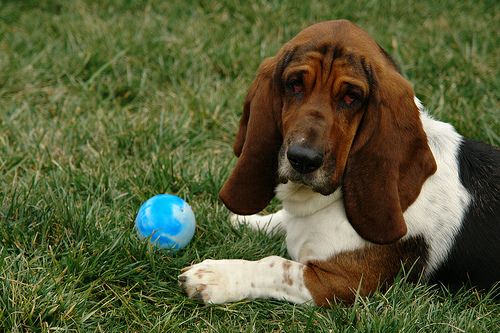

In [15]:
img = Image.fromarray(data, 'RGB')
img = PIL.ImageOps.autocontrast(img)
display(img)

# Preprocessing

Ora iniziamo sul serio

In [4]:
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteWSNL3F/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteWSNL3F/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [15]:
dataset['train']

<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [36]:
data = dataset['train'].take(1)

for example in data:
  print(list(example.keys()))
  image = example["image"]
  mask = example["segmentation_mask"][100]
  mask -= 1
  #image = tf.image.flip_left_right(image)
  print(image.shape, mask)

['file_name', 'image', 'label', 'segmentation_mask', 'species']
(500, 500, 3) tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

Prima di tutto dobbiamo ridimensionare le immagini e le mask a 128x128

In [5]:
def resize(input_image, mask_image):
  input_image = tf.image.resize(input_image, (128, 128), method='nearest')
  mask_image = tf.image.resize(mask_image, (128, 128), method='nearest')
  return input_image, mask_image

Normalizziamo le immagini nell'intervallo [0, 1] e le classi delle mask le diminuiamo di 1 in modo che siano (0, 1, 2) e non (1, 2, 3).

In [6]:
def normalize(input_image, mask_image):
  input_image = tf.cast(input_image, dtype=tf.float32)/255.0
  mask_image -= 1
  return input_image, mask_image

Funzione che aumenta il dataset flippando le immagini da sinistra verso destra

In [7]:
def augment(input_image, input_mask):
   if tf.random.uniform(()) > 0.5:
       # Random flipping of the image and mask
       input_image = tf.image.flip_left_right(input_image)
       input_mask = tf.image.flip_left_right(input_mask)

   return input_image, input_mask

Creiamo due funzioni che preprocessino il train dataset ed il test dataset con una leggera differenza per l'augment per le immagini di train

In [8]:
def load_image_train(datapoint):
  input_image = datapoint['image']
  mask_image = datapoint['segmentation_mask']
  input_image, mask_image = resize(input_image, mask_image)
  input_image, mask_image = augment(input_image, mask_image)
  input_image, mask_image = normalize(input_image, mask_image)
  return input_image, mask_image

def load_image_test(datapoint):
  input_image = datapoint['image']
  mask_image = datapoint['segmentation_mask']
  input_image, mask_image = resize(input_image, mask_image)
  input_image, mask_image = normalize(input_image, mask_image)
  return input_image, mask_image

Ora siamo pronti per applicare tali modifiche alle immagini del dataset di train e di test con la funzione map()

In [9]:
train_dataset = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = dataset['test'].map(load_image_test, num_parallel_calls=tf.data.AUTOTUNE)

In [46]:
print(train_dataset)

<_ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None))>


We define a batch size of 64 and a buffer size of 1000 for creating batches of training and test datasets. With the original TFDS dataset, there are 3680 training samples and 3669 test samples, which are further split into validation/test sets. We will use the train_batches and the validation_batches for training the U-Net model. After the training finishes, we will then use the test_batches to test the model predictions.

In [10]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_batches = test_dataset.take(3000).batch(BATCH_SIZE)
test_batches = test_dataset.skip(3000).take(669).batch(BATCH_SIZE)

In [12]:
print(train_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>


In [58]:
# lo rendo iterabile
iter_train_batches = iter(train_batches)
#prendo il primo batch con le 64 immagini ed i 64 mask
batch = next(iter_train_batches)
# prendo la 16-esima immagine
batch[0][16]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.05882353, 0.01960784, 0.01176471],
        [0.07450981, 0.01960784, 0.01568628],
        [0.07058824, 0.01568628, 0.01176471],
        ...,
        [0.10980392, 0.05490196, 0.01176471],
        [0.11764706, 0.04313726, 0.02745098],
        [0.10980392, 0.0627451 , 0.01568628]],

       [[0.05490196, 0.02352941, 0.01176471],
        [0.06666667, 0.01960784, 0.01960784],
        [0.04313726, 0.        , 0.        ],
        ...,
        [0.10980392, 0.03529412, 0.00784314],
        [0.10588235, 0.05098039, 0.01568628],
        [0.11764706, 0.04313726, 0.02745098]],

       [[0.07450981, 0.01960784, 0.01568628],
        [0.07058824, 0.01568628, 0.00392157],
        [0.05490196, 0.01176471, 0.00392157],
        ...,
        [0.09411765, 0.03921569, 0.00392157],
        [0.11372549, 0.04705882, 0.01568628],
        [0.12156863, 0.04705882, 0.01960784]],

       ...,

       [[0.08627451, 0.16470589, 0.12941177],
        [0.14

In [59]:
# prendo la rispettiva mask
batch[1][16]

<tf.Tensor: shape=(128, 128, 1), dtype=uint8, numpy=
array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)>

Ora i datasets sono pronti per l'addestramento. Vediamo un'immagine a random e la relativa maschera.

In [50]:
sample_batch = next(iter(train_batches))
sample_batch[0].shape

TensorShape([64, 128, 128, 3])

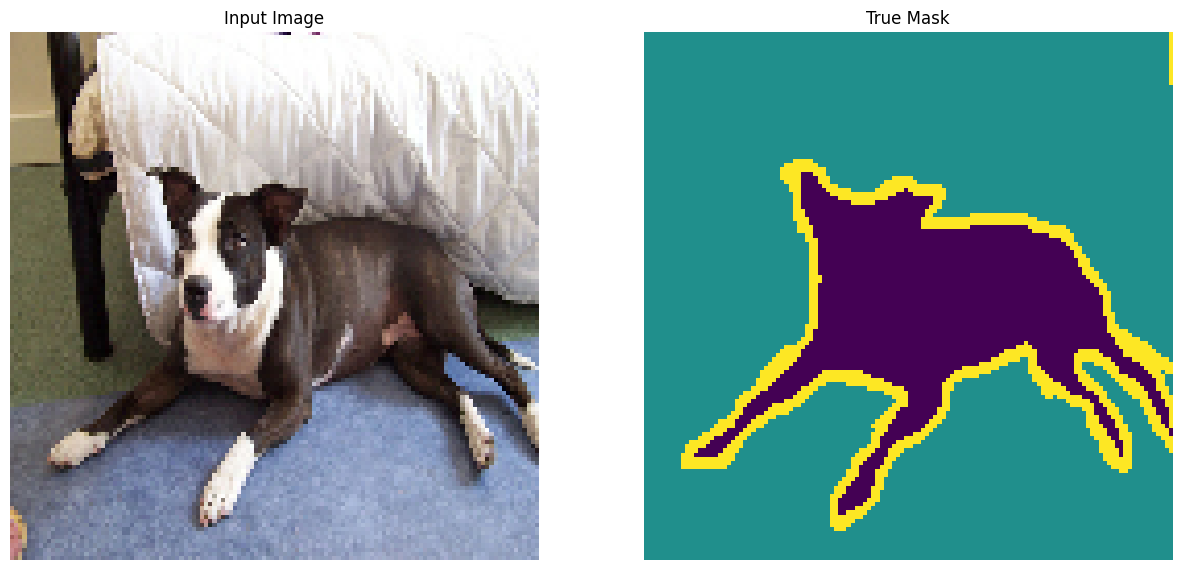

In [11]:
def display(display_list):
 plt.figure(figsize=(15, 15))

 title = ["Input Image", "True Mask", "Predicted Mask"]

 for i in range(len(display_list)):
   plt.subplot(1, len(display_list), i+1)
   plt.title(title[i])
   plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
   plt.axis("off")
 plt.show()

sample_batch = next(iter(train_batches))
random_index = np.random.choice(sample_batch[0].shape[0])
sample_image, sample_mask = sample_batch[0][random_index], sample_batch[1][random_index]
display([sample_image, sample_mask])

The sample input image of a cat is in the shape of 128x128x3. The true mask has three segments: the green background; the purple foreground object, in this case, a cat; and the yellow outline.

# Modello U-Net

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
img_size = (128, 128)
num_classes = 3
batch_size = 32

def get_model(img_size, num_classes):
    # aggiungo i 3 canali colori alle dimensioni
    # delle immagini del dataset
    inputs = keras.Input(shape=img_size + (3,))

    # prima parte della rete, contrazione delle informazioni

    # Blocco convolutivo di ingresso
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # sfruttato per connessione residuale

    # I seguenti tre blocchi sono simili eccetto per
    # il numero dei filtri utilizzati
    for filters in [64, 128, 256]:
        # questa prima activation nella prima iterazione del ciclo non cambia niente (vedi dopo nel summary del modello)
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # connessione residuale
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    # Seconda parte della rete, espansione delle informazioni
    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x

    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model


# Svuota la memoria occupata da eventuali
# precedenti modelli TensorFlow
keras.backend.clear_session()

# Creazione modello
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 64, 64, 32)           0         ['batch_normalization[0][0

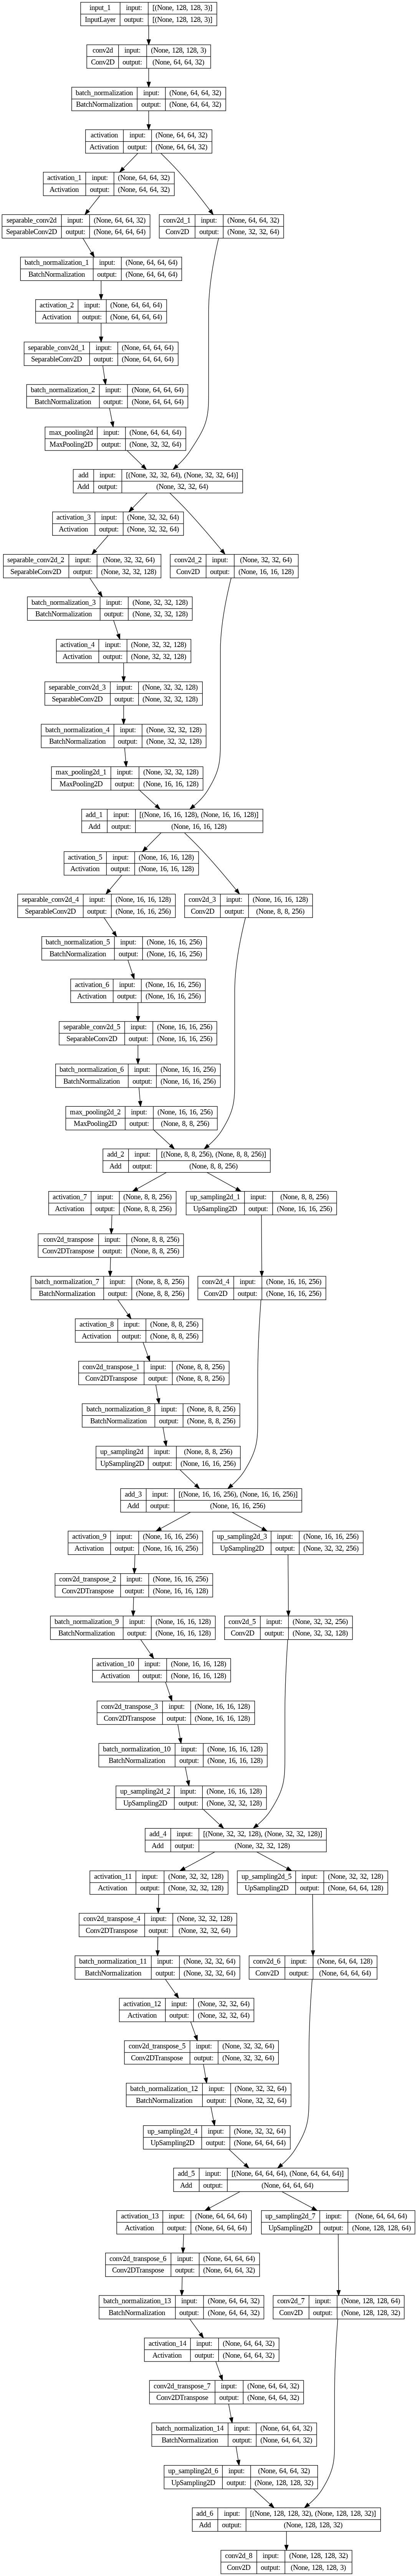

In [14]:
# plottiamo il modello
tf.keras.utils.plot_model(model, show_shapes=True, to_file='U-Net_model.png')

In [15]:
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

# Addestramento

In [16]:
print(info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir=PosixGPath('/tmp/tmpattd1c_ftfds'),
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        '

In [17]:
TRAIN_LENGTH = info.splits['train'].num_examples #3680
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
TEST_LENGTH = info.splits['test'].num_examples #3669
VALIDATION_STEPS = TEST_LENGTH // BATCH_SIZE // 5 # BATCHES OF SAMPLES TO DRAW before stopping when performing validation at the end of every epoch.

In [18]:
model_history = model.fit(train_batches,
                          epochs=20,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches,
                          verbose=1)

Epoch 1/20
57/57 [==============================] - 714s 12s/step - loss: 1.4834 - accuracy: 0.6528 - val_loss: 2.8639 - val_accuracy: 0.5862
Epoch 2/20
57/57 [==============================] - 669s 12s/step - loss: 0.7223 - accuracy: 0.7193 - val_loss: 4.2787 - val_accuracy: 0.5864
Epoch 3/20
57/57 [==============================] - 672s 12s/step - loss: 0.6060 - accuracy: 0.7574 - val_loss: 2.9297 - val_accuracy: 0.5864
Epoch 4/20
57/57 [==============================] - 670s 12s/step - loss: 0.5462 - accuracy: 0.7827 - val_loss: 2.4751 - val_accuracy: 0.5864
Epoch 5/20
57/57 [==============================] - 671s 12s/step - loss: 0.5038 - accuracy: 0.7999 - val_loss: 2.3139 - val_accuracy: 0.5864
Epoch 6/20
57/57 [==============================] - 671s 12s/step - loss: 0.4651 - accuracy: 0.8161 - val_loss: 2.8174 - val_accuracy: 0.5864
Epoch 7/20
57/57 [==============================] - 671s 12s/step - loss: 0.4400 - accuracy: 0.8246 - val_loss: 2.9209 - val_accuracy: 0.5864
Epoch 

In [20]:
# salviamo il modello in formato keras
model.save('U-Net_model.keras')

In [21]:
# per ricreare esattamente lo stesso modello con gli stessi pesi e ottimizzatore
new_model = tf.keras.models.load_model('U-Net_model.keras')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 64, 64, 32)           0         ['batch_normalization[0][0

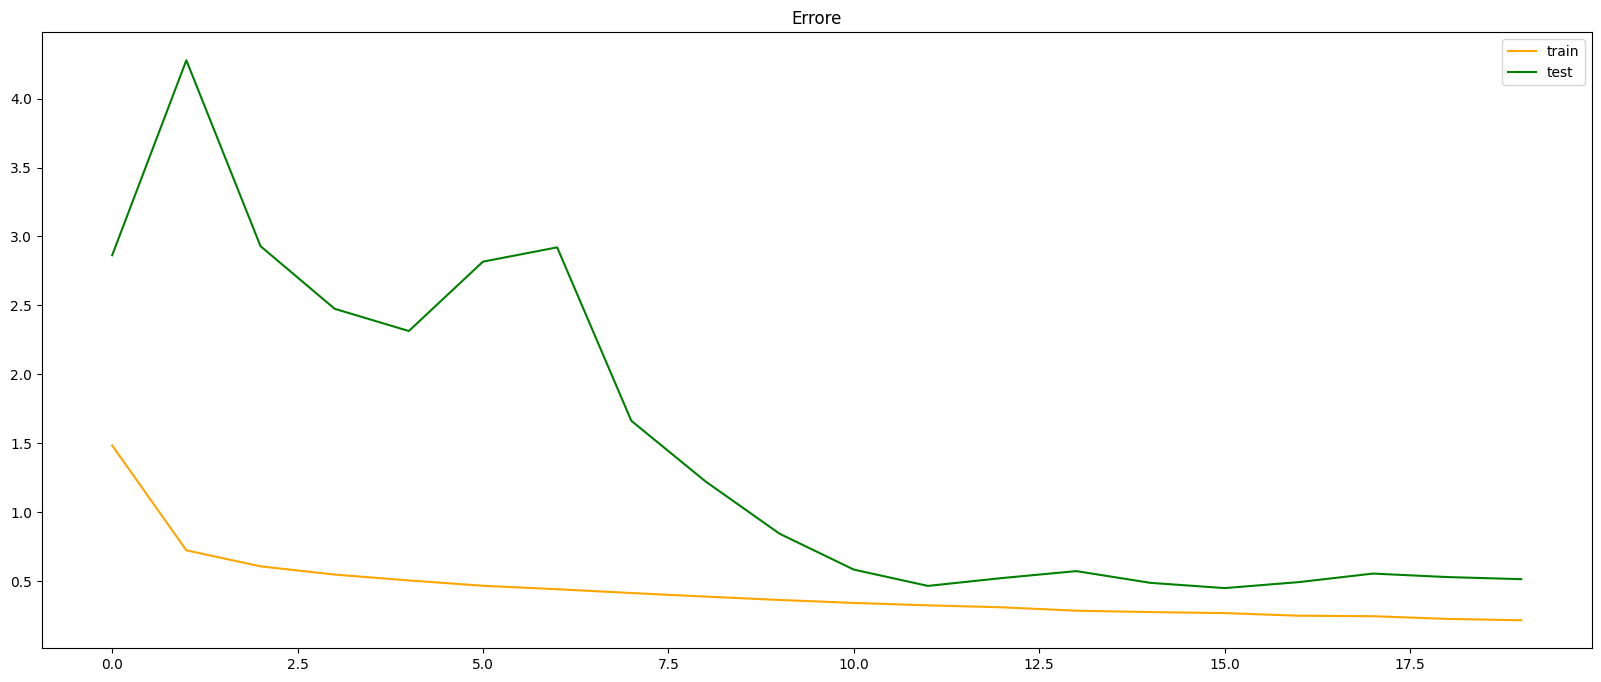

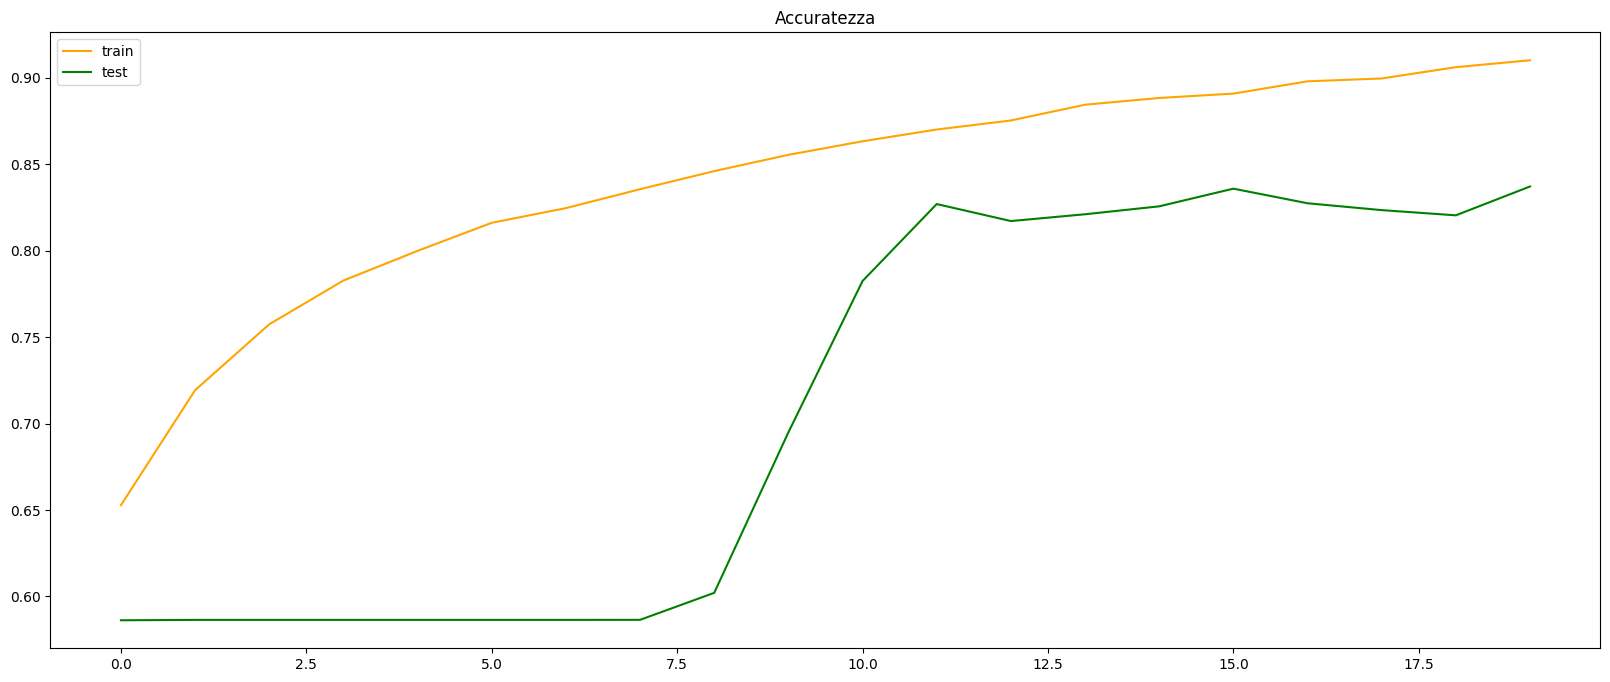

In [22]:
# grafici

#loss
plt.figure(figsize=(20, 8))
plt.plot(model_history.history['loss'], color='orange', label='train')
plt.plot(model_history.history['val_loss'], color='green', label='test')
plt.title('Errore')
plt.legend()
plt.show()

# accuracy
plt.figure(figsize=(20, 8))
plt.plot(model_history.history['accuracy'], color='orange', label='train')
plt.plot(model_history.history['val_accuracy'], color='green', label='test')
plt.title('Accuratezza')
plt.legend()
plt.show()

# Predizioni

Ora che abbiamo addestrato il modello facciamo delle predizioni per la segmetation mask su alcune immagini del dataset di test.

In a two-dimensional array, axis=-1 is equivalent to axis=1, and axis=-2 is equivalent to axis=0.

The notation a[start:stop] includes items from start up to but not including stop. So, when you see [..., 12] in a list, it means all elements up to index 12 (inclusive of the element at index 12).


In [23]:
predictions = model.predict(test_batches)

11/11 [==============================] - 47s 3s/step


In [25]:
predictions[1].shape

(128, 128, 3)

In [26]:
predictions[1]

array([[[3.5383608e-03, 9.1325659e-01, 8.3205014e-02],
        [1.2713708e-03, 9.7034407e-01, 2.8384611e-02],
        [1.1130431e-03, 9.7019947e-01, 2.8687384e-02],
        ...,
        [1.5015836e-02, 9.2602128e-01, 5.8962889e-02],
        [1.5666436e-02, 9.2744070e-01, 5.6892965e-02],
        [3.4562930e-02, 8.4438431e-01, 1.2105273e-01]],

       [[6.0552807e-04, 9.9188769e-01, 7.5067542e-03],
        [2.1833451e-04, 9.9910891e-01, 6.7271839e-04],
        [2.3129130e-04, 9.9919277e-01, 5.7589129e-04],
        ...,
        [3.3056377e-03, 9.8726994e-01, 9.4244229e-03],
        [3.4705792e-03, 9.8633295e-01, 1.0196461e-02],
        [6.0459226e-03, 9.5781398e-01, 3.6140025e-02]],

       [[7.8473048e-04, 9.8976451e-01, 9.4507094e-03],
        [3.5487165e-04, 9.9855691e-01, 1.0882023e-03],
        [4.5496147e-04, 9.9865323e-01, 8.9179934e-04],
        ...,
        [4.7249403e-03, 9.8203403e-01, 1.3240989e-02],
        [4.6403590e-03, 9.8109406e-01, 1.4265682e-02],
        [7.8248130e-03

In [29]:
pred_mask = tf.argmax(predictions[1], axis=-1)
pred_mask.shape

TensorShape([128, 128])

In [35]:
# aggingiamo la terza dimensione
pred_mask = pred_mask[..., tf.newaxis]
pred_mask.shape

TensorShape([128, 128, 1, 1, 1])

In [32]:
sample_test_batch = next(iter(test_batches))
sample_test_mask = sample_test_batch[1]
sample_test_mask.shape

TensorShape([64, 128, 128, 1])

al metodo display vanno passate imaggini (w, h, c)

In [36]:
# creaiamo la mask da una predizione
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

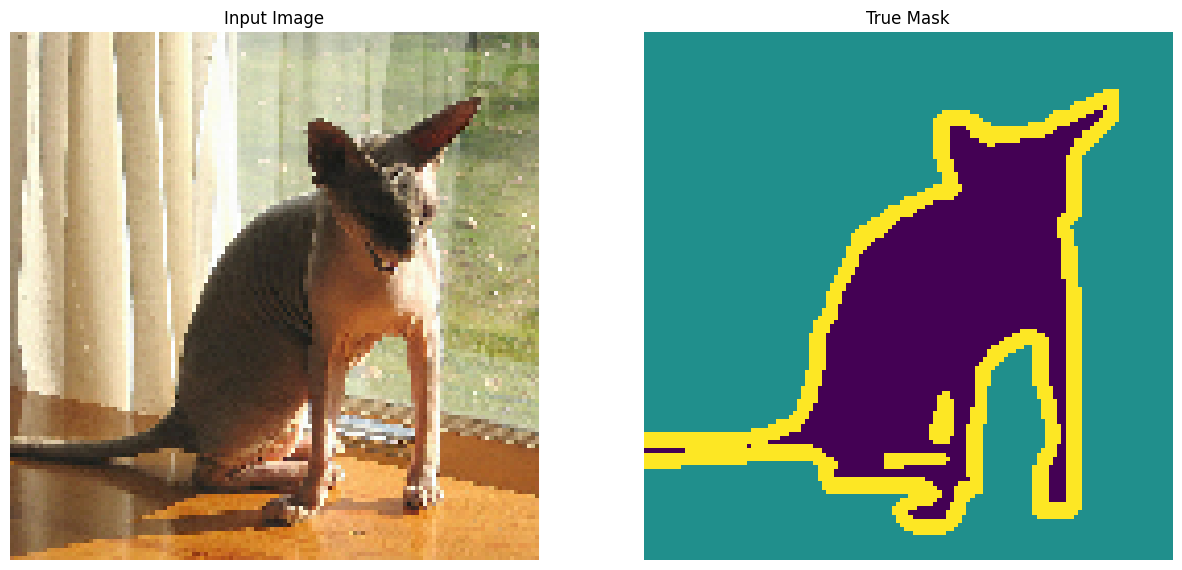

In [46]:
def display(display_list):
 plt.figure(figsize=(15, 15))

 title = ["Input Image", "True Mask", "Predicted Mask"]

 for i in range(len(display_list)):
   plt.subplot(1, len(display_list), i+1)
   plt.title(title[i])
   plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
   plt.axis("off")
 plt.show()

sample_batch = next(iter(train_batches))
random_index = np.random.choice(sample_batch[0].shape[0])
sample_image, sample_mask = sample_batch[0][random_index], sample_batch[1][random_index]
display([sample_image, sample_mask])

In [40]:
def show_predictions(dataset=None, num=1):
 if dataset:
   for image, mask in dataset.take(num):
     pred_mask = model.predict(image)
     display([image[0], mask[0], create_mask(pred_mask)])
 else:
   display([sample_image, sample_mask,
            create_mask(model.predict(sample_image[tf.newaxis, ...]))])


1/1 [==============================] - 0s 57ms/step


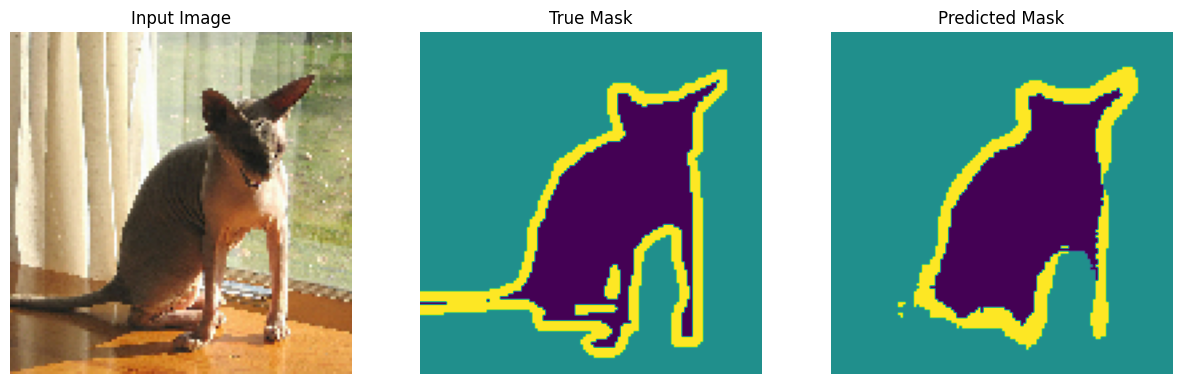

In [47]:
show_predictions()

# Finish